# Сборка генома de novo


## SPAdes

Используем команды с семинара:

python3 /projects/mipt_dbmp_biotechnology/soft/SPAdes-4.1.0-Linux/bin/spades.py --careful -1 /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R1_001.fastq -2 /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R2_001.fastq -o ~/classes/class_11/genome_assembly_results/spades

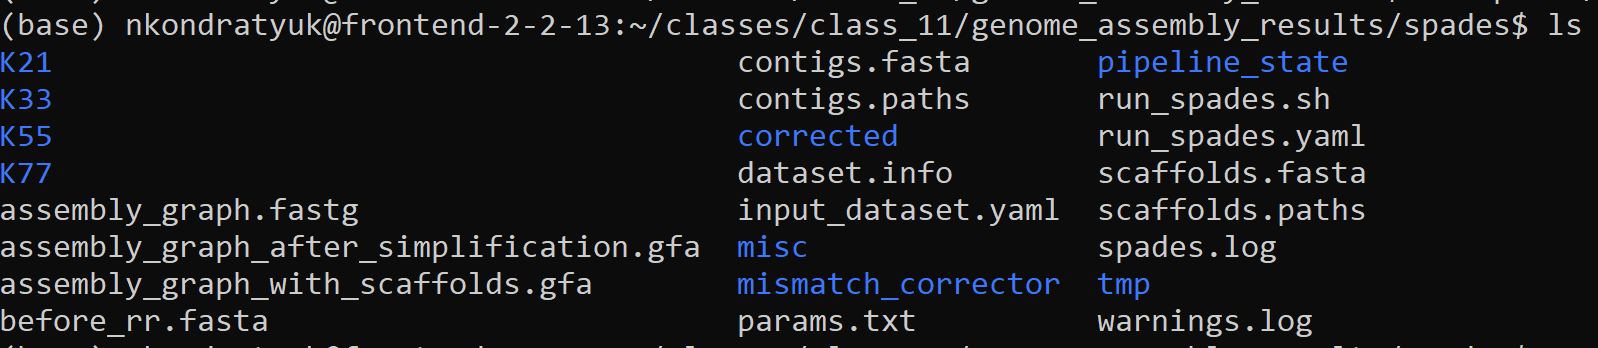

Видим, что использованы контиги 21, 33, 55, 77

Теперь используем quast, чтобы посмотреть результат сборки:

 quast.py -o spades_quast_results -m 0 --threads 1  genome_assembly_results/spades/contigs.fasta
/home/nkondratyuk/.conda/envs/qc_env/bin/quast.py -o spades_quast_results -m 0 --threads 1 genome_assembly_results/spades/contigs.fasta

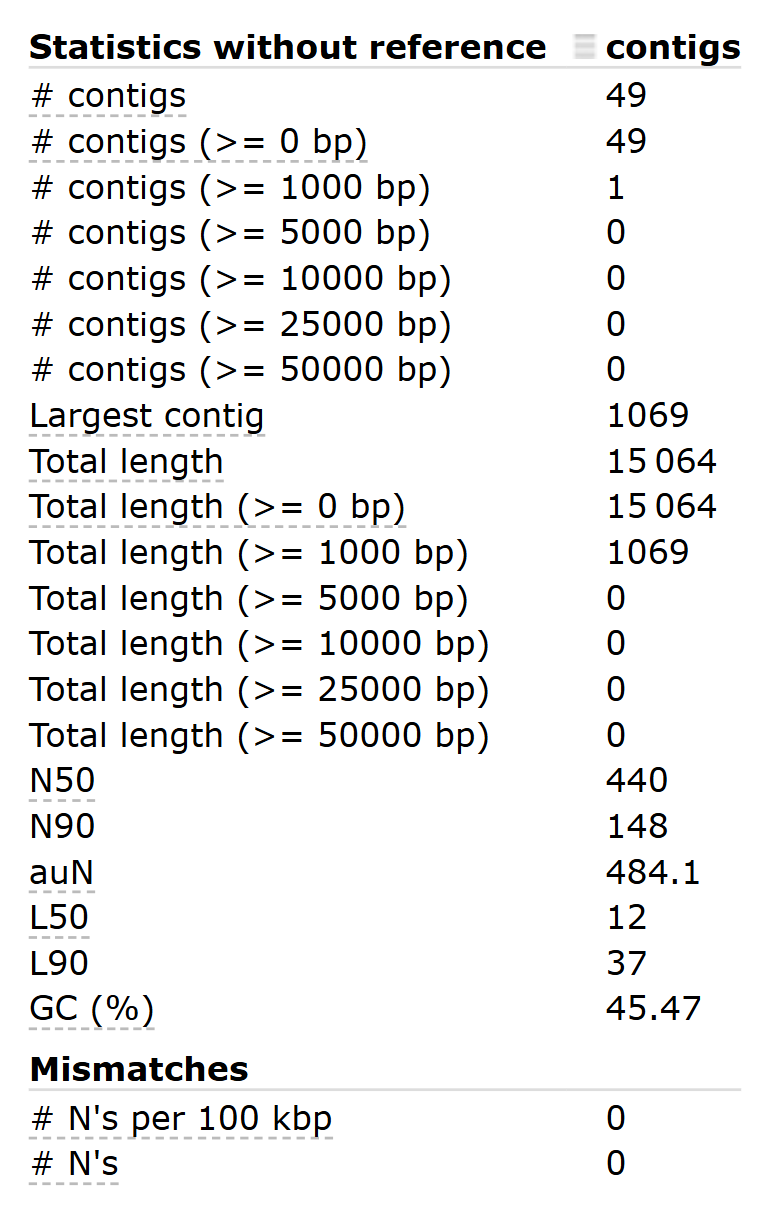

#### Контиги: 
- 49 штук (много)
- ≥ 1000 bp 1 штука
- самый большой контиг 1069 bp
- общая длина всех контигов 15 064 bp

 Сборка очень фрагментированная, неполная

## PLATANUS

Запускаем код с семинара:

/projects/mipt_dbmp_biotechnology/soft/platanus assemble -s 0 -k 39 -o ~/classes/class_11/genome_assembly_results/k39/platanus_k39 -f /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R1_001.fastq /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R2_001.fastq


/projects/mipt_dbmp_biotechnology/soft/platanus assemble  -s 0 -k 49 -o genome_assembly_results/k49/platanus_k49 -f /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R1_001.fastq /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R2_001.fastq

/projects/mipt_dbmp_biotechnology/soft/platanus assemble  -s 0 -k 63 -o genome_assembly_results/k63/platanus_k63 -f /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R1_001.fastq /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R2_001.fastq

Запускаем quast

quast.py -o assembly_analysis/platanus_spades -m 0 --threads 1 ./genome_assembly_results/k39/platanus_k39_contig.fa ./genome_assembly_results/k49/platanus_k49_contig.fa ./genome_assembly_results/k63/platanus_k63_contig.fa ./genome_assembly_results/spades/scaffolds.fasta

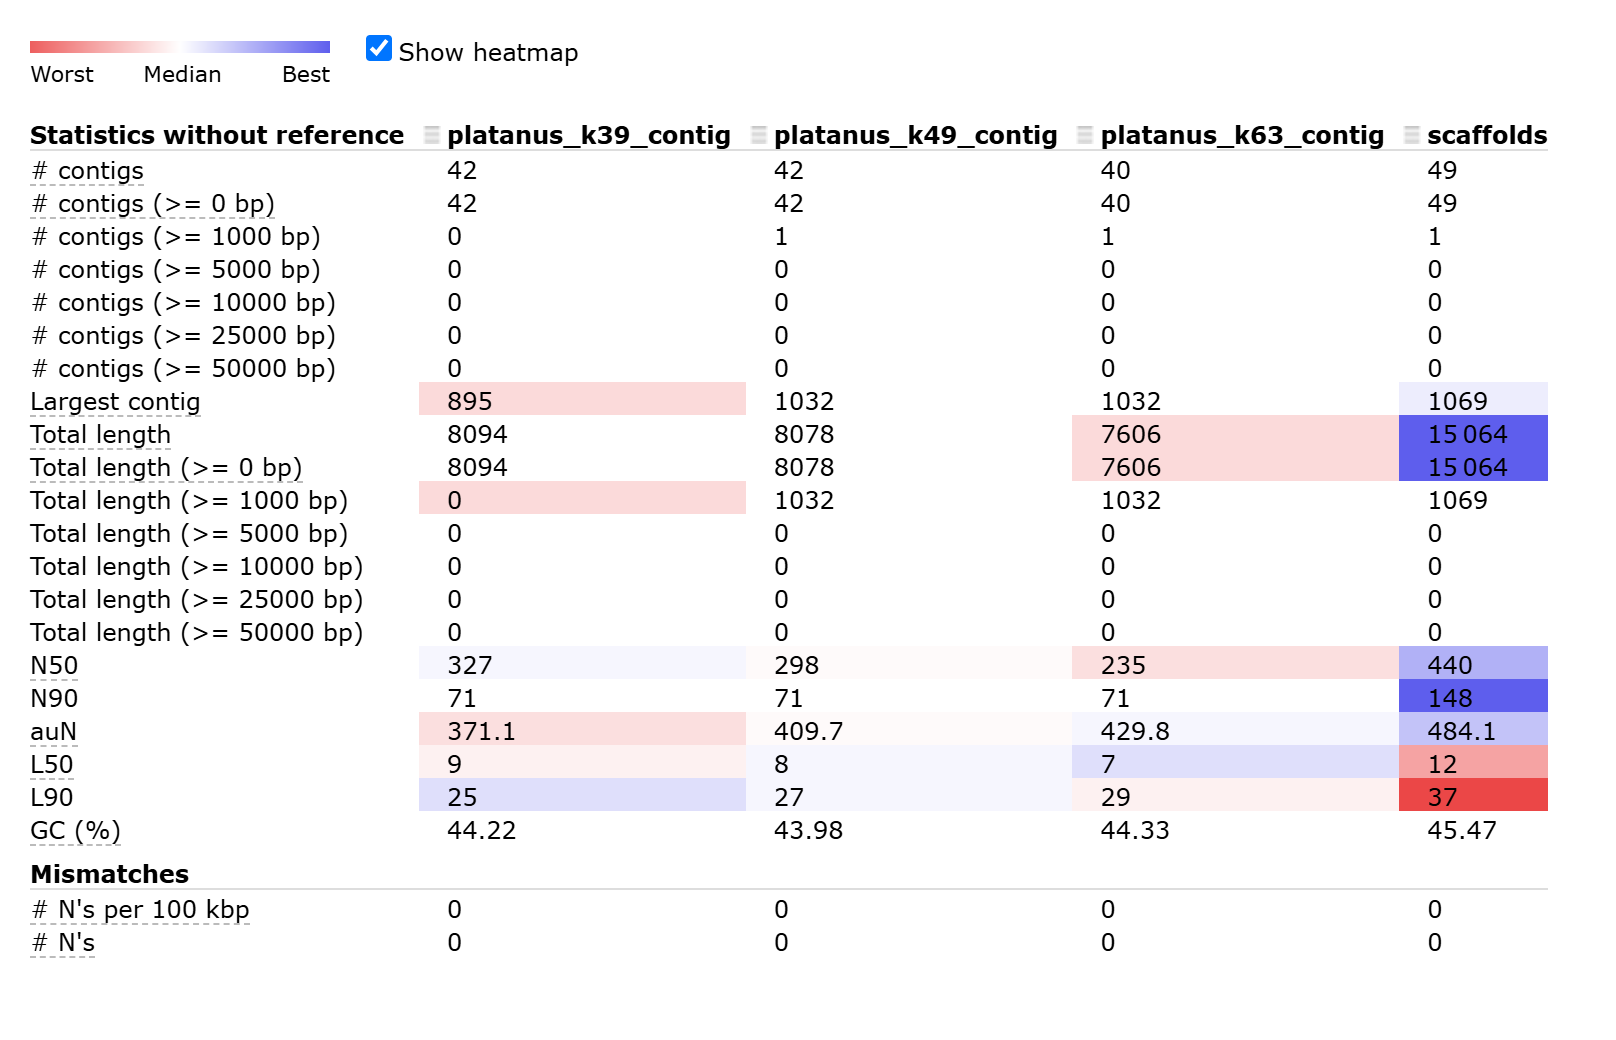

#### Контиги:
- 42, 42, 40 штук для k39, k49, k63 соответственно

- длиной ≥1000 bp нет

- Общая длина сборки k39 8094 bp, k49 8078 bp, k63 7606 bp


Также видим, что значения метрик очень плохие

## Совешенствуем сборку

K-меры — это все возможные подстроки длины k, на которые можно разбить геном или прочтения секвенирования. Для улучшения сборки будем использовать мульти-k-мерную сборку (Для Illumina (чтения 100-150 bp): k=21, 33, 55 (SPAdes пробует несколько значений автоматически), для длинных чтений (PacBio/Nanopore): k=77, 101, 127.)

python3 /projects/mipt_dbmp_biotechnology/soft/SPAdes-4.1.0-Linux/bin/spades.py   --careful   -k 21,33,55,77,99,127   -1 /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R1_001.fastq   -2 /projects/mipt_dbmp_biotechnology/genome_de_novo/7_S4_L001_R2_001.fastq   -o ~/homeworks/hw_11/genome_assembly_results_hw/spades

quast.py -o ~/homework/hw11/quast_results  -m 0 --threads 4 ~/homework/hw11/genome_assembly_results/spades/contigs.fasta ~/homework/hw11/genome_assembly_results/spades/scaffolds.fasta

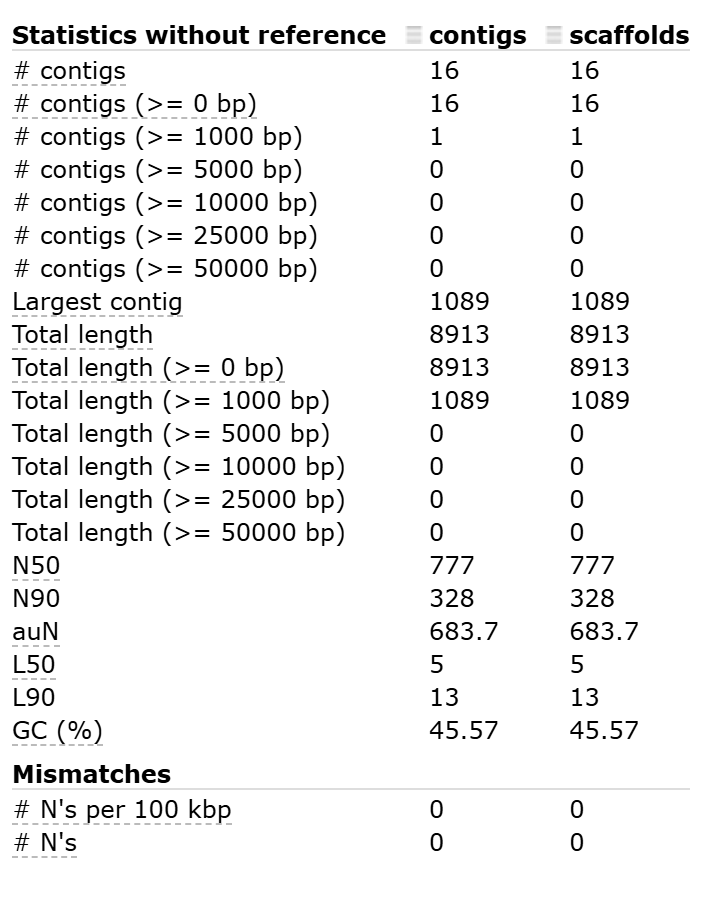

## Вывод

Видим, что сборка заметно улучшилась:
- N50 стал больше (777 vs 440)
- L50 уменьшился (5 vs 12)
- Число контигов уменьшилось (16 vs 49)